# HSV Thresholding : A Caveat

_Computer Vision and Intelligence Group, IIT Madras_

### INTRODUCTION

There are times when we unwittingly commit the same mistake incessantly without actually discovering the reason being it because we never fathom that something of that sort can actually happen. One of first hands-on application that fledgling Computer Vision enthusiasts start with is color detection to get the pixel locations with the desired color (and yes, OpenCV function `cv2.inRange` performs this task). 

In this notebook, we discuss a subtle point while using HSV pixel values to segment out a particular colour, a common first hand attempt for most detection tasks. We will try to detect the Manchester United jersey in the image below using color detection, the key colour being a hue of red.

### IMPLEMENTATION

The first step is to import the necessary modules - 
1. `pylab` - We will use `pylab` to display the images
2. `cv2` - We will use `cv2` function to manipulate our images.

In [1]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


We will define a function named `myShow` to display the image.

In [2]:
def myShow(im_title, im):
    ''' This is function to display the image'''
    plt.figure()  
    plt.title(im_title)
    plt.axis("off")
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        im_display = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        plt.imshow(im_display)
    plt.show()

We will read a image and display it using the `myShow` function.

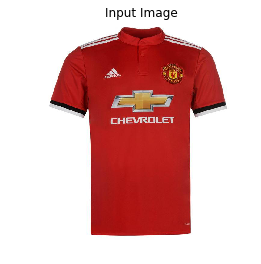

In [3]:
im = cv2.imread("manu.jpg")
myShow("Input Image", im)

As you can notice, the jersey is predominantly red, so we will set the `cv2.inrange` function with the range of RGB values of the Red color. The code snippet below performs this task -

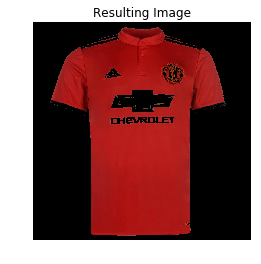

In [4]:
im_red_ball_mask = cv2.inRange(im, (0, 0, 30), (80, 80, 255))
im_red_ball_mask = im_red_ball_mask.astype('bool')
myShow("Resulting Image", im * np.dstack((im_red_ball_mask, im_red_ball_mask, im_red_ball_mask)))

If you look meticulously, you will notice that there are some white pixels that have been incorrectly classified as Red pixels. In order to remove these pixels, we will perform color detection in the HSV color space. Let's convert the image into HSV format using the `cv2.cvtColor` function.

In [5]:
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

The HSV values for true Red are $(0, 255, 255)$. But, in real world images there is always variations in the image colors values. So, we will use the cv2.inRange to generate the mask that has a value of $255$ for pixels where the HSV values fall in the range $(0-10, 100-255, 0-255)$ and a value of $0$ for pixels whose values don't lie in this interval. The mask values are either $255$ or $0$. $255$ represents Red color pixels and $0$ represents non Red color pixels. We will again convert this mask into boolean type and will then display the image using `myShow` function.

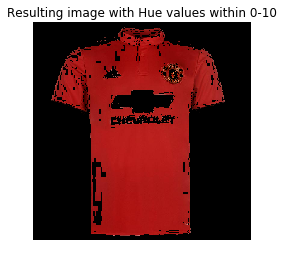

In [6]:
im_red_ball_mask_1 = cv2.inRange(im_hsv, (0, 100, 0), (10, 255, 255))
im_red_ball_mask_1 = im_red_ball_mask_1.astype('bool')
myShow("Resulting image with Hue values within 0-10", im * np.dstack((im_red_ball_mask_1, im_red_ball_mask_1, im_red_ball_mask_1)))

But what just happened!! Instead of improving, on the contrary our results deteriorated. The resulted image does not contains a major chunk of Red Pixels that were present in the previous image. The next thought that comes to mind is to tweak the HSV Values, but believe me that would not help. I am not being a pessimist here but there is an underlying idea that needs to be understood before trying anything new. The HSV color space unlike the RGB color space is a cylindrical color space (check the image [here](http://hanzratech.in/wp-content/uploads/2015/02/hsv_colorspace.jpg)). The Hue values are across a circle. So, after completing one rotation across the circle, we get the same color i.e. the Hue values at 0 and 360 represent the same color which happens to be Red. Just to avoid confusion w.r.t. to the diagram below -- OpenCV uses HSV ranges between $(0-180, 0-255, 0-0255)$, and what you will find in most books and the diagram below is that the range of $(0-360, 0-1, 0-1)$ is used to represent the entire gamut of HSV color space. So in OpenCV, the H values 179, 178, 177 and so on are as close to the true Red as H value 1, 2, 3 and so on. 

So, I think you have grasped the concept quite well and by now, you would have guessed what we will do next. Yes, we will again use the `inRange` function but this time the range of Hue will be between $170-180$ instead of $0-10$ used earlier. Here is the our new code. 

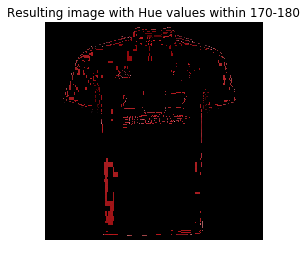

In [7]:
im_red_ball_mask_2 = cv2.inRange(im_hsv, (170, 100, 0), (180, 255, 255)) 
im_red_ball_mask_2 = im_red_ball_mask_2.astype('bool')
myShow("Resulting image with Hue values within 170-180", im * np.dstack((im_red_ball_mask_2, im_red_ball_mask_2, im_red_ball_mask_2)))

That's it, we have successfully recovered our missing red color pixels by using the new H values and have also negated the white noise pixels that we had while working in the RGB color space. Now, just for the sake of aesthetics, we will combine both the masks and then we will display the final image.

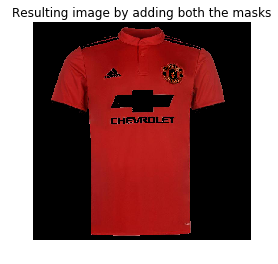

In [8]:
im_red_ball_mask_full = im_red_ball_mask_1 + im_red_ball_mask_2
myShow("Resulting image by adding both the masks", im * np.dstack((im_red_ball_mask_full, im_red_ball_mask_full, im_red_ball_mask_full)))

### RECAP
In this IPython Notebook, I showed you how an oversight while selecting your Hue values for Red color can fail your code. We also discussed how to correctly select the Hue range for Red Color.  You will need to keep this in mind while working in HLS space also.